##Twitter Sentimental Analysis Project

##Done By: Ashwath Bala S

Table of Contents:

1.Problem Statement

2.Data Dictionary

3.Importing the Required Libraries

4.Loading the Dataset

5.Data Pre-Processing (Lemmatization)

6.Model Building (Bag-of-Words)

##1. Problem Statement

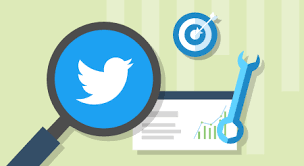

In today's digital age, social media platforms like Twitter have become significant venues for individuals to express their opinions on various topics, including products, events, political views, and global issues. Analyzing these sentiments can provide valuable insights for businesses, policymakers, and researchers.

The objective of this project is to develop a robust sentiment analysis model that can accurately classify the sentiment of tweets into positive and negative

##2. Data Dictionary

Let's check the data files! According to the data description we should find the following columns:

id - A unique identifier for each tweet

label - A label indicating whether the tweet is positive or negative (1 = positive, 0 = negative) [Target Variable]

tweet - the text of the tweet

##3. Importing the Required Libraries

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings
import nltk
from nltk.stem import WordNetLemmatizer


warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)

##4.Loading the Dataset

In [2]:
data=pd.read_csv("tweets.csv")

In [3]:
# Let us print information about a dataframe including the index, dtype and column dtypes.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [4]:
# Printing top 5 Rows
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


Check for Null Values

In [5]:
data.isnull().sum() #check for the null values

id       0
label    0
tweet    0
dtype: int64

##5.Data Pre-Processing

Dropping out the column with ID since it doesn't contribute to the output

In [6]:
data = data.drop(['id'],axis=1) #drop unnecessary columns

Understanding the class distribution helps in knowing whether the dataset is balanced or not.

<Axes: xlabel='label'>

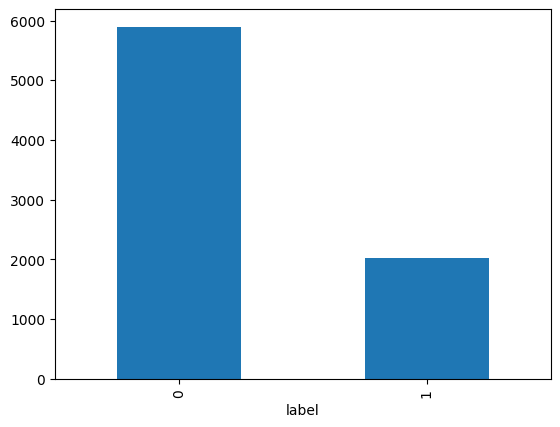

In [7]:
data['label'].value_counts().plot(kind='bar')

Lets us understand the proportion of each class

In [8]:
data['label'].value_counts(normalize=True)

label
0    0.744192
1    0.255808
Name: proportion, dtype: float64

We can infer that the given problem is a class imbalance problem

**Pre Processing the text**

1.The raw data is messy. It contains hashtags, user mentions, non ascii characters, punctuations, numbers, html entities, extra spaces, misspelled words,etc.

2.So, Data Pre-processing is the most important step prior to the model building in which we remove all the unnecessary qualities from the data.

Let us look at some of the examples

Contraction mapping : expanding the shortened versions or contraction of words using contraction dictionary

In [9]:
data.tweet[24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [10]:
newString=re.sub(r"'s\b"," is",data.tweet[24])  #converting It's to It is
newString

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

Removing user mention

In [11]:
data.tweet[11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [12]:
newString=re.sub(r'@[A-Za-z0-9]+','',data.tweet[11])
print(newString)

Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade


Removing hashtag symbol

In [13]:
data.tweet[0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [14]:
newString=re.sub("#","",data.tweet[0])
print(newString)

fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone


Removal of links

In [15]:
data.tweet[1]

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/'

In [16]:
newString=re.sub(r'http\S+', '', data.tweet[1])
newString

'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… '

Removing special characters, punctuations, numbers

In [17]:
data.tweet[25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [18]:
newString=re.sub("[^a-zA-Z]", " ", data.tweet[25])
newString

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

Removal of stop words:

Stop words usually refers to the most commonly used words in a language (such as “the”, “a”, “an”, “in”)

This step is a one of the important steps to come up with more robust input

In [19]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Text Normalization

There are 2 types of normalization techniques.

1.*Stemming* is the process of converting the words of a sentence to its non-changing portions.

For example, given the words of amusing, amusement, and amused, the stem would be amus.

2.*Lemmatization* is the process of converting the words of a sentence to its dictionary form.

For example, given the words amusement, amusing, and amused, the lemma for each and all would be amuse.

Let us implement Lemmatization in our Project


In [20]:
data.tweet[63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [22]:
# Downloading the WordNet corpus
nltk.download('wordnet')

# Initializing the lemmatizer
lemmatizer = WordNetLemmatizer()

# Sample tweet to lemmatize
new_sentence = ''
for i in data.tweet[63].split():
    new_sentence = new_sentence + lemmatizer.lemmatize(i.lower()) + ' '

print(new_sentence)

[nltk_data] Downloading package wordnet to /root/nltk_data...


gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si 


In [23]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [24]:
def tweet_cleaner(text):
    newString=re.sub(r'@[A-Za-z0-9]+','',text)                     #removing user mentions
    newString=re.sub("#","",newString)                             #removing hashtag symbol
    newString= ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")]) #contraction mapping
    newString= re.sub(r'http\S+', '', newString)                   #removing links
    newString= re.sub(r"'s\b","",newString)                        #removing 's
    letters_only = re.sub("[^a-zA-Z]", " ", newString)             #Fetching out only letters
    lower_case = letters_only.lower()                              #converting everything to lowercase
    tokens = [w for w in lower_case.split() if not w in stop_words]#stopwords removal
    newString=''
    for i in tokens:
        newString=newString+lemmatizer.lemmatize(i)+' '            #converting words to lemma
    return newString.strip()

In [25]:
cleaned_tweets = []
for i in data.tweet:
  cleaned_tweets.append(tweet_cleaner(i))
print(cleaned_tweets[:5])   #print top 5 records

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias', 'love would go talk makememories unplug relax iphone smartphone wifi connect', 'wired know george made way iphone cute daventry home', 'amazing service apple even talk question unless pay stupid support']


In [26]:
data['cleaned_tweets']= cleaned_tweets  #creating new column

**Data Visualization**

Let us understand the most commonly used words in the text before cleaning

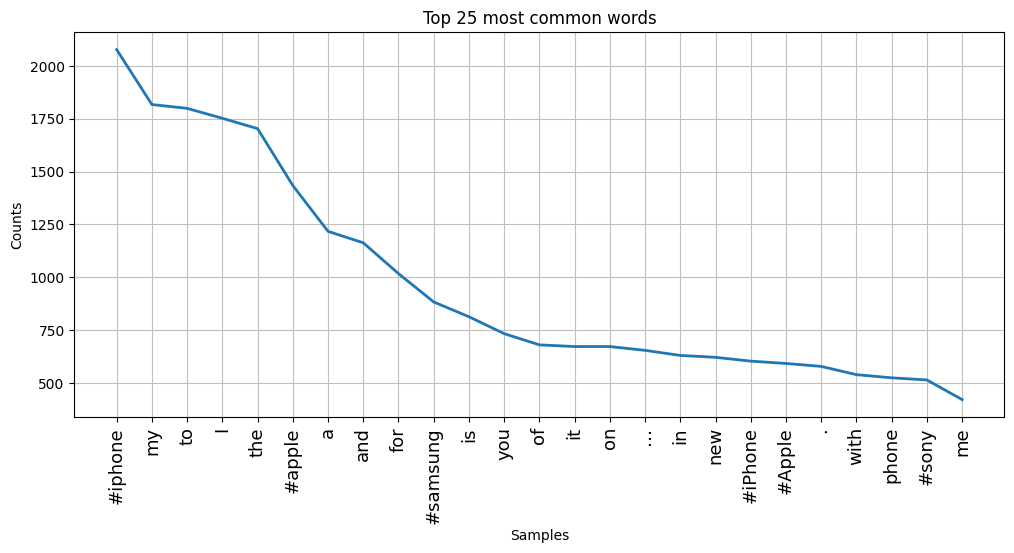

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [27]:
all_words = []
for line in list(data['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

From above plot, we can infer that most of the tweets are related to iphone, apple, samsung, sony but punctuations are also included in top common words.

Let us visualize the same plot after preprocessing

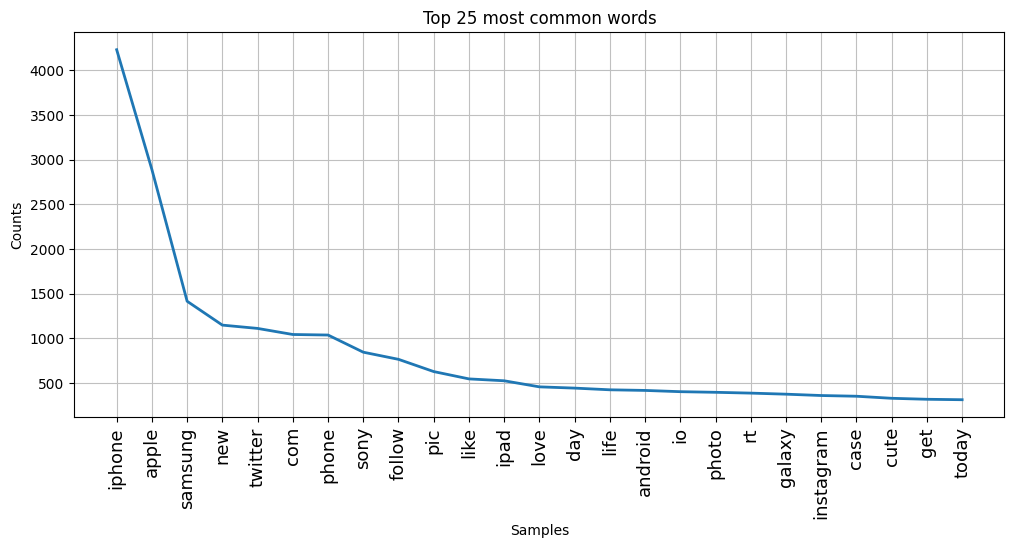

<Axes: title={'center': 'Top 25 most common words'}, xlabel='Samples', ylabel='Counts'>

In [28]:
all_words = []
for line in list(data['cleaned_tweets']):
    words = line.split()
    for word in words:
        all_words.append(word)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

From the above plot, we can observe a few more common words like instagram, love, cute, twitter, phone, rt (which stands for re-tweeted)

##6. Model Building

**Model building**

Bag of Words features

Here, frequency of every word in vocabulary is used to build the feature space.



In [29]:
vectorizer = CountVectorizer()
features= vectorizer.fit_transform(data['cleaned_tweets'])
features.shape

(7920, 15888)

Every word in the vocabulary is a feature

In [31]:
vectorizer.get_feature_names_out()

array(['aa', 'aaaahhhhhhh', 'aag', ..., 'zzita', 'zzjvgtyaxl', 'zznj'],
      dtype=object)

Split the dataset into training and validation set

In [32]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(features,data['label'],test_size=0.3,random_state=42)

Training Logistic Regression

In [33]:
lr = LogisticRegression()           #instantiate model

lr.fit(xtrain_bow, ytrain)          #training model

prediction = lr.predict(xvalid_bow) #predicting on validation set

f1_score(yvalid, prediction)        #calculating f1 score

0.7750809061488672

##In this NLP Project, we have built a Machine Learning Model to analyse sentiments of tweets, implemented techniques such as Lemmatization and Bag-of-Words.